## 📌 1️⃣ Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

pd.set_option('display.max_columns', None)

## 📌 2️⃣ Carregando os dados

In [2]:
spreadsheet_id = "1td91KoeSgXrUrCVOUkLmONG9Go3LVcXpcNEw_XrL2R0"

sheets = {
    "PEDE2022": "90992733",
    "PEDE2023": "555005642",
    "PEDE2024": "215885893"
}

def read_google_sheets(sheet_id):
  csv_url = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={sheet_id}"
  return pd.read_csv(csv_url, decimal=',')

### Dados de 2022

In [3]:
df_2022 = read_google_sheets(sheets["PEDE2022"])
df_2022.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753.0,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469.0,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629.0,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731.0,15,7,4,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344.0,6,2,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    float64
 14  Cf                     860 non-null    int64  
 15  Ct    

In [5]:
df_2022.describe()

,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


### Dados de 2023

In [6]:
df_2023 = read_google_sheets(sheets["PEDE2023"])
df_2023.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,"9,31095",Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,"8,13",8.4375,NaN,"9,6",9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,"8,2212",Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,"8,14",7.5000,NaN,"8,9",8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,"5,92975",Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"3,14",5.9375,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
3,RA-864,ALFA,"7,034",Ametista,ALFA A - G0/G1,Aluno-864,12/3/2015,1/7/1900,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"8,14",7.5000,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,8.500,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
4,RA-865,ALFA,"8,1552",Topázio,ALFA A - G0/G1,Aluno-865,11/13/2014,8,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,8.7,"7,52",7.5000,NaN,"7,4",7.3,7.5,NaN,NaN,NaN,7.915,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [7]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              932 non-null    object 
 3   Pedra 2023             932 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  Pedra 23               0 non-null      float64
 15  INDE

In [8]:
df_2023.describe()

,Ano ingresso,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,Rec Av2,Rec Av3,Rec Av4,IAA,IEG,IPP,Rec Psicologia,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
count,1014.000000,0.0,600.000000,0.0,0.0,0.0,0.0,938.000000,0.0,0.0,0.0,0.0,951.000000,938.000000,938.000000,0.0,937.000000,937.000000,334.000000,0.0,0.0,938.000000,1014.000000,1014.000000,0.0,0.0,0.0,0.0
mean,2021.378698,NaN,7.262788,NaN,NaN,NaN,NaN,3.109808,NaN,NaN,NaN,NaN,6.903049,8.699041,7.562955,NaN,6.409925,6.816756,6.200299,NaN,NaN,8.027897,7.243590,-0.654832,NaN,NaN,NaN,NaN
std,1.873750,NaN,0.895774,NaN,NaN,NaN,NaN,0.768712,NaN,NaN,NaN,NaN,3.590414,1.084001,0.984239,NaN,1.819152,1.832817,2.236545,NaN,NaN,0.945427,2.539585,0.821233,NaN,NaN,NaN,NaN
min,2016.000000,NaN,3.700000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,3.700000,3.750000,NaN,0.000000,0.000000,0.000000,NaN,NaN,3.320000,2.500000,-4.000000,NaN,NaN,NaN,NaN
25%,2021.000000,NaN,6.740250,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,6.700000,8.100000,7.083333,NaN,5.200000,5.700000,4.725000,NaN,NaN,7.462500,5.000000,-1.000000,NaN,NaN,NaN,NaN
50%,2022.000000,NaN,7.402500,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,8.500000,9.000000,7.656250,NaN,6.500000,7.000000,6.400000,NaN,NaN,8.045000,5.000000,-1.000000,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,7.903500,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,9.200000,9.500000,8.125000,NaN,7.800000,8.200000,7.800000,NaN,NaN,8.668750,10.000000,0.000000,NaN,NaN,NaN,NaN
max,2023.000000,NaN,9.442000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,10.000000,10.000000,9.791667,NaN,10.000000,10.000000,10.000000,NaN,NaN,10.010000,10.000000,2.000000,NaN,NaN,NaN,NaN


### Dados de 2024

In [9]:
df_2024 = read_google_sheets(sheets["PEDE2024"])
df_2024.head()

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,"7,611366667",Ametista,ALFA A - G0/G1,Aluno-1275,28/07/2016,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,8.7,6.3,5.6,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,5.4,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,"8,002866667",Topázio,ALFA A - G0/G1,Aluno-1276,16/10/2016,8,Feminino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,9.3,3.8,7.5,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,7.1,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,"7,9522",Ametista,ALFA A - G0/G1,Aluno-1277,16/08/2016,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.0,9.1,3.8,7.5,NaN,"8,0",10.0,6.0,NaN,NaN,NaN,7.0,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,"7,156366667",Ametista,ALFA A - G0/G1,Aluno-868,08/11/2015,8,Masculino,2023,Pública,NaN,NaN,NaN,Topázio,NaN,8.63895,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,8.0,9.8,3.8,6.9,NaN,"7,0",8.0,6.0,NaN,NaN,NaN,7.2,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,"5,4442",Quartzo,ALFA A - G0/G1,Aluno-1278,22/03/2015,9,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,9.0,4.2,3.8,5.0,NaN,"7,5",8.0,7.0,NaN,NaN,NaN,4.2,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


In [10]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1156 non-null   object 
 1   Fase                   1156 non-null   object 
 2   INDE 2024              1155 non-null   object 
 3   Pedra 2024             1155 non-null   object 
 4   Turma                  1156 non-null   object 
 5   Nome Anonimizado       1156 non-null   object 
 6   Data de Nasc           1156 non-null   object 
 7   Idade                  1156 non-null   int64  
 8   Gênero                 1156 non-null   object 
 9   Ano ingresso           1156 non-null   int64  
 10  Instituição de ensino  1155 non-null   object 
 11  Pedra 20               191 non-null    object 
 12  Pedra 21               264 non-null    object 
 13  Pedra 22               472 non-null    object 
 14  Pedra 23               690 non-null    object 
 15  INDE

In [11]:
df_2024.describe()

,Idade,Ano ingresso,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,Rec Av2,IAA,IEG,IPS,IPP,Rec Psicologia,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV
count,1156.000000,1156.000000,472.000000,690.000000,0.0,0.0,0.0,1156.000000,0.0,0.0,1054.000000,1156.000000,1054.000000,1054.000000,0.0,1051.000000,1050.000000,474.000000,0.0,0.0,1054.000000,1156.000000,1156.000000,0.0,0.0,0.0
mean,12.987889,2022.519896,7.368292,7.455472,NaN,NaN,NaN,2.951557,NaN,NaN,8.546964,7.374654,6.829886,7.551328,NaN,6.230067,6.175905,6.595886,NaN,NaN,7.353605,7.683824,-0.409170,NaN,NaN,NaN
std,3.584699,1.204804,0.861832,0.850390,NaN,NaN,NaN,1.397985,NaN,NaN,1.494124,2.845929,1.426059,0.895209,NaN,2.777791,2.379685,2.876249,NaN,NaN,1.050284,2.504055,0.850497,NaN,NaN,NaN
min,7.000000,2021.000000,3.032000,4.406458,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,2.500000,2.500000,NaN,0.000000,0.000000,0.000000,NaN,NaN,2.900000,2.500000,-3.000000,NaN,NaN,NaN
25%,10.000000,2021.000000,6.891000,6.862402,NaN,NaN,NaN,2.000000,NaN,NaN,8.000000,6.500000,6.300000,7.200000,NaN,4.500000,5.000000,5.000000,NaN,NaN,6.800000,5.000000,-1.000000,NaN,NaN,NaN
50%,12.000000,2023.000000,7.475500,7.559046,NaN,NaN,NaN,3.000000,NaN,NaN,8.800000,8.300000,7.500000,7.500000,NaN,6.500000,6.500000,7.000000,NaN,NaN,7.500000,10.000000,0.000000,NaN,NaN,NaN
75%,15.000000,2024.000000,7.981250,8.048758,NaN,NaN,NaN,4.000000,NaN,NaN,9.500000,9.400000,7.500000,8.100000,NaN,8.500000,8.000000,9.000000,NaN,NaN,8.100000,10.000000,0.000000,NaN,NaN,NaN
max,27.000000,2024.000000,9.442000,9.371200,NaN,NaN,NaN,6.000000,NaN,NaN,10.000000,10.000000,10.000000,10.000000,NaN,10.000000,10.000000,10.000000,NaN,NaN,9.800000,10.000000,3.000000,NaN,NaN,NaN


## 📌 3️⃣ Tratamento de Dados

### Padronizando nomes das colunas

In [12]:
df_2022 = df_2022.rename(columns={"Nome": "Nome Anonimizado", "Idade 22": "Idade", "Atingiu PV": "Atingiu_PV", "INDE 22": "INDE_2022", "Defas": "Defasagem", "Matem": "Mat", "Portug": "Por", "Inglês": "Ing", "Fase ideal": "Fase Ideal" })
df_2022.columns

Index(['RA', 'Fase', 'Turma', 'Nome Anonimizado', 'Ano nasc', 'Idade',
       'Gênero', 'Ano ingresso', 'Instituição de ensino', 'Pedra 20',
       'Pedra 21', 'Pedra 22', 'INDE_2022', 'Cg', 'Cf', 'Ct', 'Nº Av',
       'Avaliador1', 'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3',
       'Rec Av3', 'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu_PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV'],
      dtype='object')

In [13]:
df_2023 = df_2023.rename(columns={"Atingiu PV": "Atingiu_PV", "INDE 2023": "INDE_2023"})
df_2023.columns

Index(['RA', 'Fase', 'INDE_2023', 'Pedra 2023', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'IPP', 'Rec Psicologia',
       'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu_PV', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Destaque IPV.1'],
      dtype='object')

In [14]:
df_2024 = df_2024.rename(columns={"Atingiu PV": "Atingiu_PV", "INDE 2024": "INDE_2024"})
df_2024.columns

Index(['RA', 'Fase', 'INDE_2024', 'Pedra 2024', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Avaliador4',
       'Avaliador5', 'Avaliador6', 'IAA', 'IEG', 'IPS', 'IPP',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu_PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Escola', 'Ativo/ Inativo', 'Ativo/ Inativo.1'],
      dtype='object')

In [15]:
common_columns = list(set(df_2022.columns) & set(df_2023.columns) & set(df_2024.columns))
common_columns

['Fase',
 'IPS',
 'Nº Av',
 'Avaliador1',
 'Rec Av2',
 'Nome Anonimizado',
 'Idade',
 'IAA',
 'Rec Psicologia',
 'Ing',
 'Destaque IDA',
 'Avaliador2',
 'Destaque IEG',
 'Mat',
 'Pedra 21',
 'Gênero',
 'Ct',
 'Defasagem',
 'Cf',
 'Destaque IPV',
 'Ano ingresso',
 'Fase Ideal',
 'IAN',
 'Instituição de ensino',
 'IEG',
 'Avaliador3',
 'Cg',
 'Atingiu_PV',
 'RA',
 'Rec Av1',
 'Avaliador4',
 'Por',
 'IDA',
 'Indicado',
 'Pedra 20',
 'IPV',
 'Pedra 22',
 'Turma']

### Adicionando ano de referência

In [16]:
df_2022["Ano"] = 2022

In [17]:
df_2023["Ano"] = 2023

In [18]:
df_2024["Ano"] = 2024

### Padronizando Gênero

In [19]:
df_2022["Gênero"] = df_2022["Gênero"].replace({
    "Menina": "Feminino",
    "Menino": "Masculino"
})

In [20]:
df_2022["Gênero"].value_counts()

Gênero
Feminino     457
Masculino    403
Name: count, dtype: int64

### Tratando valores ausentes

In [21]:
df_2023['INDE_2023' ].tail()

1009    NaN
1010    NaN
1011    NaN
1012    NaN
1013    NaN
Name: INDE_2023, dtype: object

In [22]:
df_2023['INDE_2023'].isna().sum()

np.int64(82)

In [23]:
df_2023[df_2023['RA'] == 'RA-1225']

,RA,Fase,INDE_2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1,Ano
938,RA-1225,FASE 7,NaN,NaN,7E,Aluno-1225,1/29/2005,18,Feminino,2023,Concluiu o 3º EM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,252%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Fase 8 (Universitários),-1,NaN,NaN,NaN,NaN,2023


In [24]:
df_2023 = df_2023.dropna(subset=['INDE_2023'])
df_2023.tail()

,RA,Fase,INDE_2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1,Ano
933,RA-62,FASE 7,"7,610333333",Ametista,7A,Aluno-62,12/31/2005,17,Feminino,2022,Pública,NaN,NaN,Ametista,NaN,7.891,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,0.0,9.8,"6,89",8.250,NaN,"7,5",9.3,6.8,6.3,NaN,NaN,8.2150,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
934,RA-1223,FASE 7,"8,187766667",Topázio,7A,Aluno-1223,11/1/2006,1/16/1900,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,8.8,9.3,5,6.875,NaN,"9,0",9.5,8.3,9.3,NaN,NaN,7.2925,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
935,RA-38,FASE 7,"8,835333333",Topázio,7A,Aluno-38,12/23/2005,17,Feminino,2017,Privada - Programa de Apadrinhamento,Ametista,Ametista,Topázio,NaN,8.523,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,9.6,9.7,"7,52",8.750,NaN,"7,7",8.2,8.8,6.0,NaN,NaN,8.8825,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
936,RA-1224,FASE 7,"7,5524",Ametista,7A,Aluno-1224,1/9/2003,1/19/1900,Masculino,2023,Concluiu o 3º EM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,8.3,9.4,5,7.125,NaN,"8,0",8.2,6.3,9.5,NaN,NaN,7.6325,5.0,Fase 8 (Universitários),-1,NaN,NaN,NaN,NaN,2023
937,RA-39,FASE 7,"8,710333333",Topázio,7A,Aluno-39,1/19/2006,17,Feminino,2017,Privada - Programa de Apadrinhamento,Ametista,Ametista,Ágata,NaN,6.033,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,9.6,9.1,"7,52",8.750,NaN,"7,8",8.3,7.8,7.2,NaN,NaN,8.7575,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023


In [25]:
df_2023 = df_2023[df_2023['INDE_2023'] != "#DIV/0!"].reset_index()
df_2023

,index,RA,Fase,INDE_2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1,Ano
0,0,RA-861,ALFA,"9,31095",Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,"8,13",8.4375,NaN,"9,6",9.8,9.4,NaN,NaN,NaN,8.9200,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023
1,1,RA-862,ALFA,"8,2212",Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,"8,14",7.5000,NaN,"8,9",8.5,9.2,NaN,NaN,NaN,8.5850,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN,2023
2,2,RA-863,ALFA,"5,92975",Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"3,14",5.9375,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,6.2600,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023
3,3,RA-864,ALFA,"7,034",Ametista,ALFA A - G0/G1,Aluno-864,12/3/2015,1/7/1900,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,"8,14",7.5000,NaN,"6,3",7.0,5.5,NaN,NaN,NaN,8.5000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023
4,4,RA-865,ALFA,"8,1552",Topázio,ALFA A - G0/G1,Aluno-865,11/13/2014,8,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,8.7,"7,52",7.5000,NaN,"7,4",7.3,7.5,NaN,NaN,NaN,7.9150,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,933,RA-62,FASE 7,"7,610333333",Ametista,7A,Aluno-62,12/31/2005,17,Feminino,2022,Pública,NaN,NaN,Ametista,NaN,7.891,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,0.0,9.8,"6,89",8.2500,NaN,"7,5",9.3,6.8,6.3,NaN,NaN,8.2150,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
927,934,RA-1223,FASE 7,"8,187766667",Topázio,7A,Aluno-1223,11/1/2006,1/16/1900,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,8.8,9.3,5,6.8750,NaN,"9,0",9.5,8.3,9.3,NaN,NaN,7.2925,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
928,935,RA-38,FASE 7,"8,835333333",Topázio,7A,Aluno-38,12/23/2005,17,Feminino,2017,Privada - Programa de Apadrinhamento,Ametista,Ametista,Topázio,NaN,8.523,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,9.6,9.7,"7,52",8.7500,NaN,"7,7",8.2,8.8,6.0,NaN,NaN,8.8825,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,NaN,2023
929,936,RA-1224,FASE 7,"7,5524",Ametista,7A,Aluno-1224,1/9/2003,1/19/1900,Masculino,2023,Concluiu o 3º EM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Avaliador-32,NaN,Avaliador-7,NaN,Avaliador-23,NaN,Avaliador-8,NaN,8.3,9.4,5,7.1250,NaN,"8,0",8.2,6.3,9.5,NaN,NaN,7.6325,5.0,Fase 8 (Universitários),-1,NaN,NaN,NaN,NaN,2023


### Tratando e convertendo dados numericos

In [26]:
df_2023["Idade"] = df_2023["Idade"].str.replace(r"^1/", "", regex=True)  # Remove "1/" at the beginning
df_2023["Idade"] = df_2023["Idade"].str.replace(r"/1900$", "", regex=True)  # Remove "/1900" at the end

df_2023["Idade"] = pd.to_numeric(df_2023["Idade"], errors="coerce")
df_2023["Idade"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: Idade
Non-Null Count  Dtype
--------------  -----
931 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


In [27]:
df_2023['INDE_2023'] = pd.to_numeric(df_2023['INDE_2023'].str.replace(",", "."))
df_2023['INDE_2023'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: INDE_2023
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [28]:
df_2023['IPS'] = pd.to_numeric(df_2023['IPS'].str.replace(",", "."))
df_2023['IPS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: IPS
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [29]:
df_2023['IDA'] = pd.to_numeric(df_2023['IDA'].str.replace(",", "."))
df_2023['IDA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 931 entries, 0 to 930
Series name: IDA
Non-Null Count  Dtype  
--------------  -----  
931 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [30]:
df_2024.tail()

,RA,Fase,INDE_2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1,Ano
1151,RA-1658,9,INCLUIR,INCLUIR,9,Aluno-1658,14/12/2002,21,Masculino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando,2024
1152,RA-1659,9,INCLUIR,INCLUIR,9,Aluno-1659,04/02/2003,21,Masculino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando,2024
1153,RA-1252,9,INCLUIR,INCLUIR,9,Aluno-1252,03/06/2002,22,Feminino,2021,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Faculdade (FIAP),Cursando,Cursando,2024
1154,RA-1660,9,INCLUIR,INCLUIR,9,Aluno-1660,28/06/2000,24,Feminino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando,2024
1155,RA-1661,9,INCLUIR,INCLUIR,9,Aluno-1661,29/01/2003,21,Feminino,2021,Bolsista Universitário *Formado (a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Fase 8 (Universitários),1,NaN,NaN,NaN,Bolsista Universitário *Formado (a),Cursando,Cursando,2024


In [31]:
df_2024['INDE_2024'].value_counts()

INDE_2024
#DIV/0!        63
INCLUIR        38
7,8262          2
8,3792          2
8,185838803     1
               ..
8,119860173     1
7,466126407     1
6,287171862     1
8,2432          1
6,380227911     1
Name: count, Length: 1054, dtype: int64

In [32]:
df_2024[(df_2024['INDE_2024'] == "#DIV/0!") | (df_2024['INDE_2024'] == "INCLUIR")].shape

(101, 51)

In [33]:
df_2024 = df_2024[(df_2024['INDE_2024'] != "#DIV/0!") & (df_2024['INDE_2024'] != "INCLUIR")].reset_index()
df_2024.tail()

,index,RA,Fase,INDE_2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1,Ano
1050,1050,RA-86,7E,"7,611233333",Ametista,7E,Aluno-86,04/10/2006,18,Masculino,2021,Privada *Parcerias com Bolsa 100%,Topázio,Ametista,Ametista,NaN,7.566,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7,9.7,6.6,7.5,NaN,"5,5",6.4,6.3,3.8,NaN,NaN,7.5,10.0,Fase 7 (3° EM),0,NaN,NaN,NaN,FIAP School - SP,Cursando,Cursando,2024
1051,1051,RA-143,7E,"7,449366667",Ametista,7E,Aluno-143,01/08/2009,15,Masculino,2021,Privada - Programa de Apadrinhamento,Topázio,Topázio,Topázio,Ametista,8.638,7.794358,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.9,6.9,7.5,NaN,"2,6",0.0,0.0,7.9,NaN,NaN,7.5,10.0,Fase 5 (1° EM),2,NaN,NaN,NaN,Colégio Arco Íris Evolução,Cursando,Cursando,2024
1052,1052,RA-166,7E,"8,243183333",Topázio,7E,Aluno-166,03/06/2008,16,Masculino,2021,Privada *Parcerias com Bolsa 100%,Ametista,Ametista,Topázio,Topázio,8.253,8.105583,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,9.2,6.6,7.5,NaN,"8,3",8.2,7.8,8.8,NaN,NaN,7.5,10.0,Fase 6 (2° EM),1,NaN,NaN,NaN,FIAP School - SP,Cursando,Cursando,2024
1053,1053,RA-191,7E,"7,7887",Ametista,7E,Aluno-191,21/05/2009,15,Masculino,2021,Privada *Parcerias com Bolsa 100%,Topázio,Topázio,Topázio,Ametista,8.740,7.263667,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,9.6,5.9,7.5,NaN,"6,4",6.0,6.9,6.3,NaN,NaN,7.5,10.0,Fase 5 (1° EM),2,NaN,NaN,NaN,FIAP School - SP,Cursando,Cursando,2024
1054,1105,RA-1221,8F,NaN,NaN,8F,Aluno-1221,15/10/2001,23,Feminino,2023,Concluiu o 3º EM,NaN,NaN,NaN,Topázio,NaN,8.027467,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"8,0",7.0,7.0,10.0,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,Concluiu o 3º EM,Cursando,Cursando,2024


In [34]:
df_2024['INDE_2024'] = pd.to_numeric(df_2024['INDE_2024'].str.replace(",", "."))
df_2024['INDE_2024'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: INDE_2024
Non-Null Count  Dtype  
--------------  -----  
1054 non-null   float64
dtypes: float64(1)
memory usage: 8.4 KB


In [35]:
df_2024['IDA'] = pd.to_numeric(df_2024['IDA'].str.replace(",", "."))
df_2024['IDA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: IDA
Non-Null Count  Dtype  
--------------  -----  
1055 non-null   float64
dtypes: float64(1)
memory usage: 8.4 KB


### Concatenando os três dataframes em um único


In [36]:
df_final = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_final.head()

,RA,Fase,Turma,Nome Anonimizado,Ano nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE_2022,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu_PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Ano,index,INDE_2023,Pedra 2023,Data de Nasc,Pedra 23,INDE 22,INDE 23,IPP,Destaque IPV.1,INDE_2024,Pedra 2024,Avaliador5,Avaliador6,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1,7,A,Aluno-1,2003.0,19,Feminino,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753.0,18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RA-2,7,A,Aluno-2,2005.0,17,Feminino,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469.0,8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RA-3,7,A,Aluno-3,2005.0,17,Feminino,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629.0,13.0,6.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RA-4,7,A,Aluno-4,2005.0,17,Masculino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731.0,15.0,7.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RA-5,7,A,Aluno-5,2005.0,17,Feminino,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344.0,6.0,2.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     2846 non-null   object 
 1   Fase                   2846 non-null   object 
 2   Turma                  2846 non-null   object 
 3   Nome Anonimizado       2846 non-null   object 
 4   Ano nasc               860 non-null    float64
 5   Idade                  2846 non-null   int64  
 6   Gênero                 2846 non-null   object 
 7   Ano ingresso           2846 non-null   int64  
 8   Instituição de ensino  2845 non-null   object 
 9   Pedra 20               722 non-null    object 
 10  Pedra 21               1020 non-null   object 
 11  Pedra 22               1875 non-null   object 
 12  INDE_2022              860 non-null    float64
 13  Cg                     860 non-null    float64
 14  Cf                     860 non-null    float64
 15  Ct  

## 📌 4️⃣ Codificação de Variáveis Categóricas (Correção de Tipos)

In [38]:
df_final['Atingiu_PV'].value_counts()

Atingiu_PV
Não    747
Sim    113
Name: count, dtype: int64

In [39]:
df_final['Atingiu_PV'].isna().sum()

np.int64(1986)

In [41]:
df_final = df_final.dropna(subset=["Atingiu_PV"])

In [42]:
df_final['Atingiu_PV'].isna().sum()

np.int64(0)

In [43]:
le = LabelEncoder()
df_final["Atingiu_PV"] = le.fit_transform(df_final["Atingiu_PV"])
df_final['Atingiu_PV'].value_counts()

Atingiu_PV
0    747
1    113
Name: count, dtype: int64

In [44]:
#  categorias sem relação de ordem
df_final = pd.get_dummies(df_final, columns=['Gênero', 'Instituição de ensino', 'Escola', 'Ativo/ Inativo'])

In [45]:
# categorias com relação de ordem

oe = OrdinalEncoder()
for col in ['Fase', 'Fase Ideal']:
    df_final[col] = df_final[col].astype(str)
    df_final[[col]] = oe.fit_transform(df_final[[col]])

In [46]:
label_encoders = {}
for col in ['Turma', 'Idade', 'Pedra 20', 'Pedra 21',
       'Pedra 22', 'Avaliador1', 'Rec Av1', 'Avaliador2', 'Rec Av2',
       'Avaliador3', 'Rec Av3', 'Avaliador4', 'Rec Av4', 'Rec Psicologia',
       'Indicado', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Pedra 2023', 'Data de Nasc', 'Pedra 23', 'Pedra 2024',
       'Avaliador5', 'Avaliador6']:
    df_final[col] = df_final[col].astype(str)  # Converter tudo para string antes de aplicar o LabelEncoder
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le

## 📌 5️⃣ Seleção de Features e Definição do Target


In [47]:
X = df_final.drop(columns=["Atingiu_PV", "Nome Anonimizado", "Ano", "Ativo/ Inativo.1", "RA"])  # Removendo variável resposta e colunas irrelevantes
y = df_final["Atingiu_PV"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/postech/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/Caskroom/miniforge/base/envs/postech/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/Caskroom/miniforge/base/envs/postech/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [48]:
X

,Fase,Turma,Ano nasc,Idade,Ano ingresso,Pedra 20,Pedra 21,Pedra 22,INDE_2022,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,index,INDE_2023,Pedra 2023,Data de Nasc,Pedra 23,INDE 22,INDE 23,IPP,Destaque IPV.1,INDE_2024,Pedra 2024,Avaliador5,Avaliador6,Gênero_Feminino,Gênero_Masculino,Instituição de ensino_Escola JP II,Instituição de ensino_Escola Pública,Instituição de ensino_Rede Decisão
0,7.0,0,2003.0,9,2016,0,0,1,5.783,753.0,18.0,10.0,4.0,3,2,1,4,2,4,0,2,8.3,4.1,5.6,3,4.0,2.7,3.5,6.0,1,7.278,5.0,8.0,-1,1,1,1,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,True,False
1,7.0,0,2005.0,7,2017,0,0,0,7.055,469.0,8.0,3.0,4.0,3,4,1,4,2,4,0,4,8.8,5.2,6.3,4,6.8,6.3,4.5,9.7,0,6.778,10.0,7.0,0,1,1,1,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,False,True
2,7.0,0,2005.0,7,2016,0,0,3,6.591,629.0,13.0,6.0,4.0,3,4,1,4,2,5,0,4,0.0,7.9,5.6,4,5.6,5.8,4.0,6.9,0,7.556,10.0,7.0,0,0,1,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,False,True
3,7.0,0,2005.0,7,2017,0,0,1,5.951,731.0,15.0,7.0,4.0,3,4,1,1,2,2,0,2,8.8,4.5,5.6,3,5.0,2.8,3.5,8.7,0,5.278,10.0,7.0,0,1,1,1,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,False,True,False,False,True
4,7.0,0,2005.0,7,2016,0,0,0,7.427,344.0,6.0,2.0,4.0,3,4,1,4,2,5,0,4,7.9,8.6,5.6,3,5.2,7.0,2.9,5.7,0,7.389,10.0,7.0,0,0,1,1,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.0,23,2015.0,12,2022,3,3,2,8.398,48.0,10.0,3.0,2.0,0,4,2,1,6,3,1,5,10.0,9.1,7.5,0,8.4,8.5,8.2,NaN,0,8.000,10.0,0.0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,False,True,False,True,False
856,0.0,23,2013.0,14,2022,3,3,2,8.154,97.0,27.0,5.0,2.0,0,4,2,1,6,3,1,5,8.5,8.9,7.5,0,9.5,9.6,9.3,NaN,0,9.083,5.0,1.0,-1,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,True,False
857,0.0,23,2015.0,12,2022,3,3,0,7.523,301.0,84.0,8.0,2.0,0,2,2,1,6,3,1,5,10.0,7.1,5.6,3,7.7,8.4,6.9,NaN,0,7.333,10.0,0.0,0,1,0,1,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,False,True,False,True,False
858,0.0,23,2015.0,12,2022,3,3,2,8.325,58.0,15.0,4.0,2.0,0,4,2,1,6,3,1,5,8.5,8.7,7.5,0,8.9,9.4,8.4,NaN,0,8.250,10.0,0.0,0,0,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,True,False,False,True,False


In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
855    0
856    1
857    0
858    0
859    0
Name: Atingiu_PV, Length: 860, dtype: int64

In [50]:
y.value_counts()

Atingiu_PV
0    747
1    113
Name: count, dtype: int64

# 📌 6️⃣ Treinamento do Modelo


In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Fazer previsões
y_pred = model.predict(X_test)

# 📌 7️⃣ Avaliação do Modelo


In [53]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.0000
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        24

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



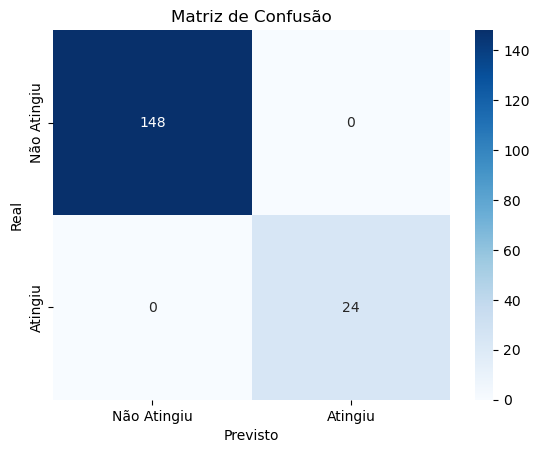

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Atingiu", "Atingiu"], yticklabels=["Não Atingiu", "Atingiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [64]:
importances_atingiu_pv = model.feature_importances_
importances_atingiu_pv

array([0.00716255, 0.01750644, 0.00858872, 0.00813904, 0.00752951,
       0.00469963, 0.00305298, 0.00517723, 0.08656451, 0.08878358,
       0.06460402, 0.02633309, 0.00382927, 0.00400389, 0.02635048,
       0.00437799, 0.01114853, 0.00634472, 0.01376465, 0.00121784,
       0.00451463, 0.01518013, 0.0186335 , 0.01305495, 0.00756949,
       0.02126327, 0.0206542 , 0.0160267 , 0.01594706, 0.00875334,
       0.38123937, 0.0065743 , 0.00778421, 0.01051178, 0.0020212 ,
       0.00881678, 0.02649513, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00304985, 0.00219104, 0.        , 0.00319123, 0.00734917])

In [66]:
df_feature_importance_atingiu_pv = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_atingiu_pv
}).sort_values(by='Importance', ascending=False)
df_feature_importance_atingiu_pv

,Feature,Importance
30,IPV,0.381239
9,Cg,0.088784
8,INDE_2022,0.086565
10,Cf,0.064604
36,Destaque IPV,0.026495
14,Rec Av1,0.026350
11,Ct,0.026333
25,IDA,0.021263
26,Mat,0.020654
22,IEG,0.018634


/var/folders/_w/n3ywz6nx76d0w8yk7f93g_xm0000gn/T/ipykernel_33549/2342995913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_feature_importance_atingiu_pv["Importance"], y=df_feature_importance_atingiu_pv["Feature"], palette="viridis")


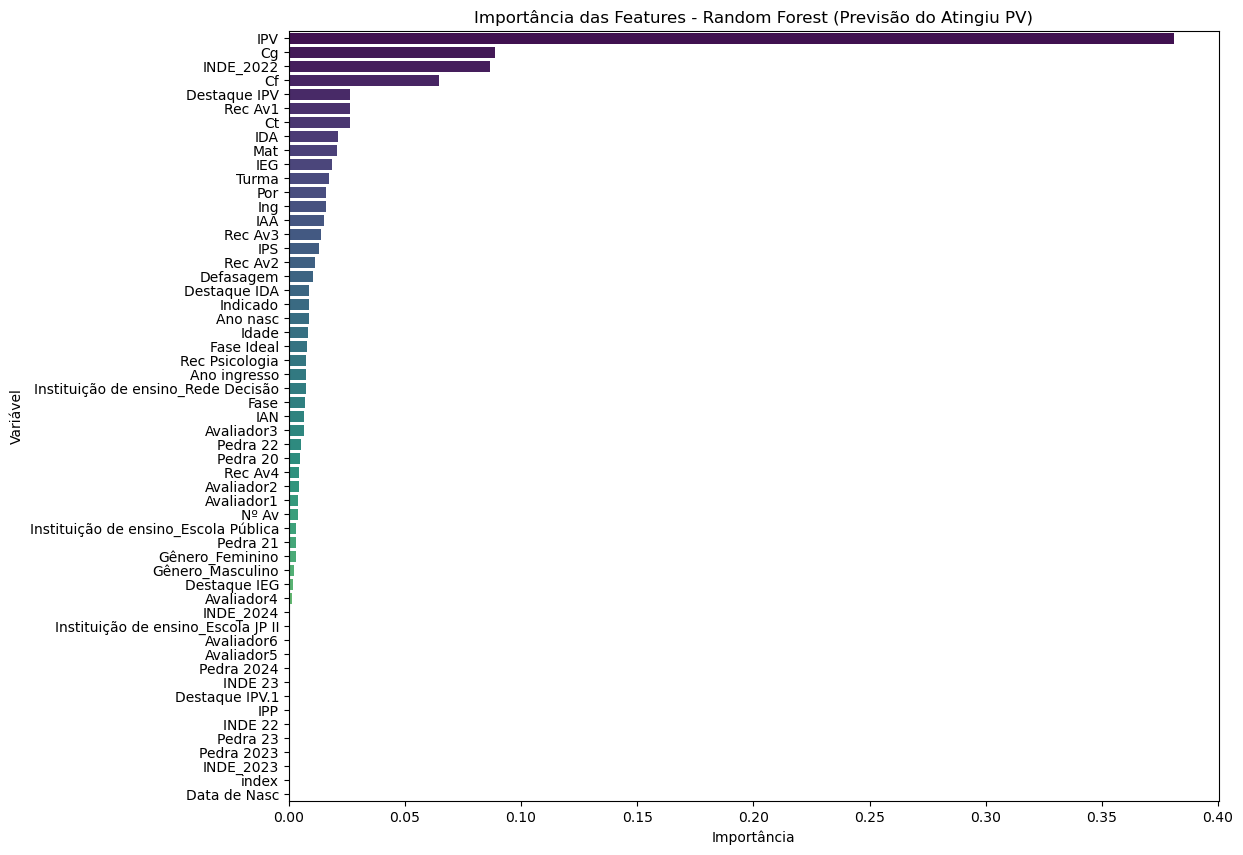

In [69]:
plt.figure(figsize=(12, 10))
sns.barplot(x=df_feature_importance_atingiu_pv["Importance"], y=df_feature_importance_atingiu_pv["Feature"], palette="viridis")
plt.title("Importância das Features - Random Forest (Previsão do Atingiu PV)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

In [70]:
X.columns

Index(['Fase', 'Turma', 'Ano nasc', 'Idade', 'Ano ingresso', 'Pedra 20',
       'Pedra 21', 'Pedra 22', 'INDE_2022', 'Cg', 'Cf', 'Ct', 'Nº Av',
       'Avaliador1', 'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3',
       'Rec Av3', 'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'index', 'INDE_2023', 'Pedra 2023', 'Data de Nasc',
       'Pedra 23', 'INDE 22', 'INDE 23', 'IPP', 'Destaque IPV.1', 'INDE_2024',
       'Pedra 2024', 'Avaliador5', 'Avaliador6', 'Gênero_Feminino',
       'Gênero_Masculino', 'Instituição de ensino_Escola JP II',
       'Instituição de ensino_Escola Pública',
       'Instituição de ensino_Rede Decisão'],
      dtype='object')

## 📌 Treinamento com a API Nativa do XGBoost

In [55]:
# Converter os dados para o formato DMatrix do XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [56]:
# Parâmetros do modelo XGBoost
params = {
    "objective": "binary:logistic",  # Classificação binária
    "eval_metric": "logloss",       # Métrica de avaliação
    "max_depth": 6,                 # Profundidade máxima da árvore
    "eta": 0.1,                     # Taxa de aprendizado
    "seed": 42                      # Aleatoriedade
}

In [57]:
# Treinamento do modelo
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100  # Número de iterações (árvores)
)

In [58]:
# Fazer previsões
y_pred_prob = xgb_model.predict(dtest)  # Probabilidades
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]  # Convertendo para classes

In [59]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo XGBoost: {accuracy:.4f}")

Acurácia do modelo XGBoost: 1.0000


In [60]:
print("Relatório de Classificação (XGBoost):")
print(classification_report(y_test, y_pred))

Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        24

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[148,   0],
       [  0,  24]])

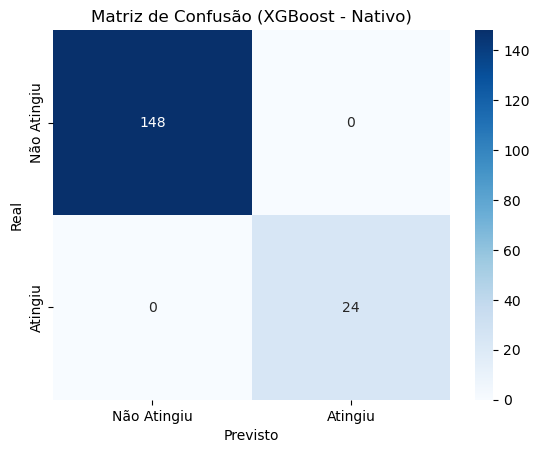

In [62]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Atingiu", "Atingiu"], yticklabels=["Não Atingiu", "Atingiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão (XGBoost - Nativo)")
plt.show()